# Bag-Of-Words Analysis

This notebook includes preliminary analysis of bagging, random forest, and AdaBoost using bag-of-words (BoW) features. Random Forest Evaluation is then performed in more details using BoW features.

## Preliminary BoW Analysis

In [31]:
import pandas as pd

# read in all data
test = pd.read_csv('../data/test.txt', delimiter=';', names=['text', 'target'])
train = pd.read_csv('../data/train.txt', delimiter=';',
                    names=['text', 'target'])
val = pd.read_csv('../data/val.txt', delimiter=';', names=['text', 'target'])
trainval = pd.concat([train,val])
testval = pd.concat([test,val])

In [32]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# create vectorier for BoW
vectorizer = CountVectorizer(max_df=.5,min_df=5, ngram_range=(1,1), stop_words='english')
BoW = vectorizer.fit_transform(trainval.text)
print('Number of Features in BoW: ',len(vectorizer.get_feature_names_out()))

X_trainval = vectorizer.transform(trainval.text).toarray()
Y_trainval = trainval.target
X_train = vectorizer.transform(train.text).toarray()
Y_train = train.target
X_val = vectorizer.transform(val.text).toarray()
Y_val = val.target
X_test = vectorizer.transform(test.text).toarray()
Y_test = test.target


Number of Features in BoW:  3397


### Bagging Classification with DT

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import sklearn.metrics as skm

bag = BaggingClassifier(n_estimators=10, random_state=0)
bag.fit(X_train, Y_train)
Y_test_pred = bag.predict(X_test)

train_acc = bag.score(X_train, Y_train)
test_acc = bag.score(X_test, Y_test)


In [34]:
# get metrics

print('---------------- Bagging Statistics ----------------')
print('Train Accuracy: {:.4}'.format(train_acc))
print('Test Accuracy: {:.4}'.format(test_acc))
print(skm.classification_report(Y_test, Y_test_pred))
pd.DataFrame(skm.confusion_matrix(Y_test, Y_test_pred), 
    columns=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
             index=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])


---------------- Bagging Statistics ----------------
Train Accuracy: 0.9833
Test Accuracy: 0.849
              precision    recall  f1-score   support

       anger       0.83      0.91      0.87       275
        fear       0.83      0.87      0.85       224
         joy       0.90      0.82      0.86       695
        love       0.71      0.75      0.73       159
     sadness       0.88      0.89      0.89       581
    surprise       0.60      0.65      0.62        66

    accuracy                           0.85      2000
   macro avg       0.79      0.82      0.80      2000
weighted avg       0.85      0.85      0.85      2000



,anger,fear,joy,love,sadness,surprise
anger,250,5,7,1,10,2
fear,8,195,1,1,7,12
joy,17,9,572,40,50,7
love,2,0,33,119,3,2
sadness,22,14,13,7,519,6
surprise,1,13,7,0,2,43


### Random Forest with DT

In [35]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, Y_train)
Y_test_pred = rf.predict(X_test)

train_acc = rf.score(X_train, Y_train)
test_acc = rf.score(X_test, Y_test)


In [36]:
print('------------- Random Forest Statistics -------------')
print('Train Accuracy: {:.4}'.format(train_acc))
print('Test Accuracy: {:.4}'.format(test_acc))
print(skm.classification_report(Y_test, Y_test_pred))
pd.DataFrame(skm.confusion_matrix(Y_test, Y_test_pred),
             columns=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
             index=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

------------- Random Forest Statistics -------------
Train Accuracy: 0.9892
Test Accuracy: 0.879
              precision    recall  f1-score   support

       anger       0.87      0.91      0.89       275
        fear       0.85      0.89      0.87       224
         joy       0.90      0.89      0.90       695
        love       0.75      0.79      0.77       159
     sadness       0.92      0.90      0.91       581
    surprise       0.70      0.64      0.67        66

    accuracy                           0.88      2000
   macro avg       0.83      0.84      0.83      2000
weighted avg       0.88      0.88      0.88      2000



,anger,fear,joy,love,sadness,surprise
anger,250,5,9,1,9,1
fear,10,200,0,0,7,7
joy,5,6,619,34,24,7
love,2,0,30,125,1,1
sadness,19,11,20,7,522,2
surprise,1,12,9,0,2,42


### AdaBoost Classification with DT

In [37]:
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as skm

ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(X_train, Y_train)
Y_test_pred = ada.predict(X_test)

train_acc = ada.score(X_train, Y_train)
test_acc = ada.score(X_test, Y_test)


In [38]:

print('---------------- AdaBoost Statistics ----------------')
print('Train Accuracy: {:.4}'.format(train_acc))
print('Test Accuracy: {:.4}'.format(test_acc))
print(skm.classification_report(Y_test, Y_test_pred))
pd.DataFrame(skm.confusion_matrix(Y_test, Y_test_pred),
             columns=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
             index=['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])


---------------- AdaBoost Statistics ----------------
Train Accuracy: 0.3806
Test Accuracy: 0.3925
              precision    recall  f1-score   support

       anger       0.81      0.09      0.17       275
        fear       0.66      0.24      0.35       224
         joy       0.37      0.94      0.53       695
        love       0.51      0.24      0.32       159
     sadness       0.00      0.00      0.00       581
    surprise       0.72      0.20      0.31        66

    accuracy                           0.39      2000
   macro avg       0.51      0.29      0.28      2000
weighted avg       0.38      0.39      0.28      2000



,anger,fear,joy,love,sadness,surprise
anger,26,5,244,0,0,0
fear,1,54,168,1,0,0
joy,4,0,654,33,1,3
love,1,2,118,38,0,0
sadness,0,3,573,3,0,2
surprise,0,18,29,0,6,13


## Detailed Analysis and Fine Tuning 
**Random Forrest** showed the most promising initial results. In this section we fine tune parameters and perform additional evaluation of the model and its performance.

### BoW Generation and Dataset Transformation
We duplicate here from above for additional testing and tuning if required.

In [39]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# create vectorier for BoW
vectorizer = CountVectorizer(max_df=0.5, min_df=5, stop_words='english', ngram_range=(1, 1))
BoW = vectorizer.fit_transform(trainval.text)
print('Number of Features in BoW: ', len(vectorizer.get_feature_names_out()))

enc = LabelEncoder().fit(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

# transform all the data
X_trainval = vectorizer.transform(trainval.text).toarray()
Y_trainval = enc.transform(trainval.target)
X_train = vectorizer.transform(train.text).toarray()
Y_train = enc.transform(train.target)
X_val = vectorizer.transform(val.text).toarray()
Y_val = enc.transform(val.target)
X_test = vectorizer.transform(test.text).toarray()
Y_test = enc.transform(test.target)




Number of Features in BoW:  3397


### Multiclass ROC Curve Function
Function to generate a multiclass ROC plot. We'll use this for further evaluation.

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

classes = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

def plot_mc_roc(Y_test_bin, Y_test_proba, n_classes, title='ROC Curve'):
    ax = plt.axes()
    leg = []
    for i in range(n_classes):
        y_score = Y_test_proba[:, i]
        fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score)
        roc_auc = auc(fpr, tpr)
        leg.append(classes[i] + ' (auc = {:.4})'.format(roc_auc))
        RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)

    plt.xlim((0, .4))
    plt.ylim((.6, 1))
    plt.legend(leg)
    plt.title(title)


### Evaluate Hyperparameters

#### N-Estimators Evaluation
Evaluating random forrest performance as the number of estimator trees is changed.

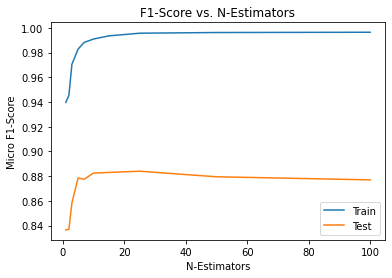

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

train_F1 = []
test_F1 = []
ne_samps = [1, 2, 3, 5, 7, 10, 15, 25, 50, 100]
for ne in ne_samps:
    rf = RandomForestClassifier(n_estimators=ne, random_state=0)
    rf.fit(X_trainval, Y_trainval)
    Y_test_pred = rf.predict(X_test)
    Y_train_pred = rf.predict(X_trainval)
    train_F1.append(f1_score(Y_trainval, Y_train_pred, average='micro'))
    test_F1.append(f1_score(Y_test, Y_test_pred, average='micro'))

plt.xlabel('N-Estimators')
plt.ylabel('Micro F1-Score')
plt.title('F1-Score vs. N-Estimators')
plt.plot(ne_samps, train_F1)
plt.plot(ne_samps, test_F1)
plt.legend(['Train','Test'])

#### Max Features Evaluation

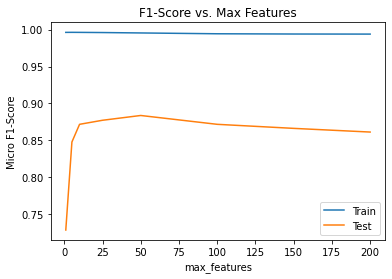

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

train_F1 = []
test_F1 = []
mf_samps = [1, 5, 10, 25, 50, 100, 150, 200]
for mf in mf_samps:
    rf = RandomForestClassifier(n_estimators=25, max_features=mf, random_state=0)
    rf.fit(X_trainval, Y_trainval)
    Y_test_pred = rf.predict(X_test)
    Y_train_pred = rf.predict(X_trainval)
    train_F1.append(f1_score(Y_trainval, Y_train_pred, average='micro'))
    test_F1.append(f1_score(Y_test, Y_test_pred, average='micro'))

plt.xlabel('max_features')
plt.ylabel('Micro F1-Score')
plt.title('F1-Score vs. Max Features')
plt.plot(mf_samps, train_F1)
plt.plot(mf_samps, test_F1)
plt.legend(['Train', 'Test'])


### Train Model

              precision    recall  f1-score   support

           0      0.865     0.909     0.887       275
           1      0.887     0.839     0.862       224
           2      0.911     0.899     0.905       695
           3      0.742     0.723     0.732       159
           4      0.930     0.917     0.924       581
           5      0.659     0.848     0.742        66

    accuracy                          0.884      2000
   macro avg      0.832     0.856     0.842      2000
weighted avg      0.886     0.883     0.884      2000

Top-2 Accuracy:  0.981


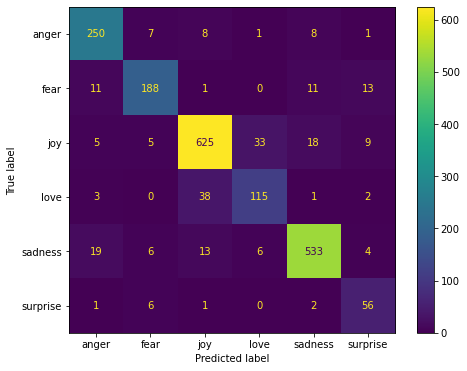

In [43]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=25, max_features=50, random_state=0)
rf.fit(X_trainval, Y_trainval)
Y_test_pred = rf.predict(X_test)
Y_test_proba = rf.predict_proba(X_test)
print(skm.classification_report(Y_test, Y_test_pred, digits=3))
print('Top-2 Accuracy: ', skm.top_k_accuracy_score(Y_test, Y_test_proba,k=2))
plt.figure(figsize=(8, 6))
ax = plt.axes()
skm.ConfusionMatrixDisplay(skm.confusion_matrix(Y_test, Y_test_pred), display_labels=classes).plot(ax=ax)



#### plot ROC curve for un-tuned Random Forrest Classifier

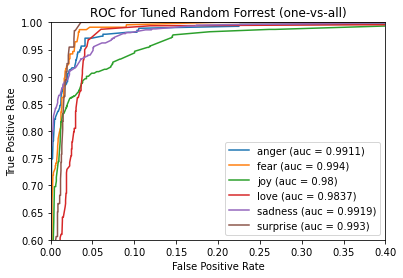

In [44]:
from sklearn.preprocessing import label_binarize

Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3, 4, 5])
Y_test_proba = rf.predict_proba(X_test)
plot_mc_roc(Y_test_bin, Y_test_proba, n_classes=6, title='ROC for Tuned Random Forrest (one-vs-all)')